In [21]:
#импорт библиотек
import matplotlib.pyplot as plt
import matplotlib.colors as colorsq
import numpy as np

In [22]:
#расстояние между точками
def dist(x1, y1, x2, y2):
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

In [23]:
n = 100
e, minPointsCount = 5, 3
color_list = []
for i in range(n):
    color_list.append('r')

colors = ['lavenderblush', 'blue', 'green', 'cyan', 'magenta', 'yellow', 'black', 'darkmagenta', 'darkorange', 'maroon',
          'pink', 'crimson', 'lime', 'red', 'gray', 'olive', 'dodgerblue', 'skyblue']

x = [np.random.randint(1, 50) for i in range(n)]
y = [np.random.randint(1, 50) for i in range(n)]

flags = []
for i in range(0, n):
    s = 0
    #если расстояние до точек меньше, то считаем соседей и помечаем зеленым
    for j in range(0, n):
        if dist(x[i], y[i], x[j], y[j]) <= e:
            s += 1
    if s > minPointsCount:
        flags.append('g')
    else:
        flags.append('black')

#проверяем черные на крайние
for i in range(0, n):
    if flags[i] == 'black':
        for j in range(0, n):
            if flags[j] == 'g':
                if dist(x[i], y[i], x[j], y[j]) <= e:
                    flags[i] = 'y'
cluster = []
for i in range(n):
    cluster.append(0)

#формируем группы
c = 1
for i in range(0, n):
    if flags[i] == 'g':
        for j in range(0, n):
            if dist(x[i], y[i], x[j], y[j]) <= e:
                if flags[j] == 'g':
                    if cluster[i] == 0 and cluster[j] == 0:
                        cluster[i] = c
                        cluster[j] = c
                        c += 1
                    elif cluster[i] == 0 and cluster[j] != 0:
                        cluster[i] = cluster[j]
                    elif cluster[j] == 0 and cluster[i] != 0:
                        cluster[j] = cluster[i]
                    elif cluster[i] != 0 and cluster[j] != 0:
                        if cluster[i] < cluster[j]:
                            cluster[j] = cluster[i]
                        else:
                            cluster[i] = cluster[j]
                elif flags[j] == 'y':
                    if cluster[i] == 0:
                        cluster[i] = c
                        c += 1

for i in range(0, n):
    if flags[i] == 'y':
        for j in range(0, n):
            if flags[j] == 'g':
                if dist(x[i], y[i], x[j], y[j]) <= e and cluster[j] != 0:
                    cluster[i] = cluster[j]

for i in range(n):
    for j in range(len(colors)):
        if cluster[i] == j:
            color_list[i] = colors[j]


cluster.sort()
print(cluster)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 10, 10, 10, 10, 10]


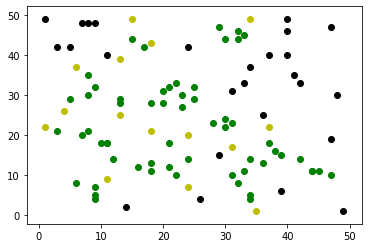

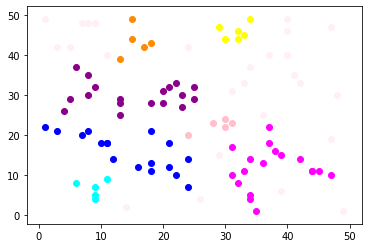

In [24]:
#визуализируем
for i in range(0, n):
    plt.scatter(x[i], y[i], color=flags[i])
plt.show()

for i in range(0, n):
    plt.scatter(x[i], y[i], color=color_list[i])
plt.show()